Code to analyse the boundary search done in the HMS O2 computing cluster.

A couple of jobs (22,32) were killed due to some cluster-related issues. These jobs have been deleted from the "_scratch" folder because the arrays are damaged and cannot be plotted. Two more didn't finish, but as can be seen in cell 3, they were almost converged. Since the convergence in the rest is good, we stay with this.

In [1]:
import sys,os
sys.path.append("../bin")
from import_paths import path_to_eigen, path_to_utilsGRF, path_to_utilsGRF_
sys.path.append(path_to_utilsGRF_)
import AnalyseBoundarysearch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import BoundaryFinder as BF
import alphashape
import time

In [3]:
datafolderm='/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb'
datafolder='../clustersearch'
subfolder="2022_01_22_N6univ_otherp"
unfinishedfolder=os.path.join(datafolderm,"2022_01_22_N6univ_otherp_scratch")
folder1=os.path.join(datafolder,subfolder)
ashapesfolder="./ashapes"
jid="47623780"
njobs=32
basename="N6univ"

name_ashape="ashape_%s"%basename
extremespars=[[10**(-0.3),10**(0.3)],[10**(-0.7),10**(0.7)]] #copy-paste from the boundary search
absder="True"


In [4]:
#check convergence
for i in range(1,njobs+1):
    fout=os.path.join(folder1,"%s_%d.out"%(jid,i))
    #print("##########",fout)
    lines=open(fout,"r").readlines()
    if len(lines)>1:
        line=lines[1]
        splitted=line.strip().split(",")
        #print(line)
        new=[]
        for k in range(1,len(splitted)-1,2):
            iter_=splitted[k]
            #print(iter_, iter_.split(" "))
            niter,nnew=[float(x.strip(".")) for x in iter_.split(" ")]
            new.append(nnew)
        #plt.figure(figsize=(4,3))
        #plt.scatter(range(len(new)),new)
        #plt.show()
        if len(new)<1500:
            print(i,"!!!not long enough", len(new), np.sum(new[-100:]),np.sum(new[-500:]))
        else:
            if np.sum(new[-1500:])==0:
                print(i,"ok",end=",")
            else:
                print("\n",i,np.sum(new[-1500:]),np.sum(new[-500:]))
    else:
        print(i,"!!!not enough lines")

1 ok,2 ok,3 ok,4 ok,5 ok,
 6 3.0 0.0
7 ok,8 ok,9 ok,10 ok,11 ok,12 ok,13 ok,
 14 28.0 2.0
15 ok,16 ok,17 ok,18 ok,19 ok,20 ok,21 ok,22 !!!not long enough 310 29.0 5057.0
23 ok,24 ok,25 ok,26 ok,27 ok,28 ok,29 ok,30 ok,31 ok,32 !!!not long enough 1485 0.0 6.0


folder to check ../clustersearch/2022_01_22_N6univ_otherp/tocheck_N6univ
folders are
['../clustersearch/2022_01_22_N6univ_otherp/final_results/mat_N6univ_9', '../clustersearch/2022_01_22_N6univ_otherp/final_results/mat_N6univ_8', '../clustersearch/2022_01_22_N6univ_otherp/final_results/mat_N6univ_3', '../clustersearch/2022_01_22_N6univ_otherp/final_results/mat_N6univ_2', '../clustersearch/2022_01_22_N6univ_otherp/final_results/mat_N6univ_30', '../clustersearch/2022_01_22_N6univ_otherp/final_results/mat_N6univ_12', '../clustersearch/2022_01_22_N6univ_otherp/final_results/mat_N6univ_26', '../clustersearch/2022_01_22_N6univ_otherp/final_results/mat_N6univ_27', '../clustersearch/2022_01_22_N6univ_otherp/final_results/mat_N6univ_18', '../clustersearch/2022_01_22_N6univ_otherp/final_results/mat_N6univ_19', '../clustersearch/2022_01_22_N6univ_otherp/final_results/mat_N6univ_15', '../clustersearch/2022_01_22_N6univ_otherp/final_results/mat_N6univ_14', '../clustersearch/2022_01_22_N6univ_otherp

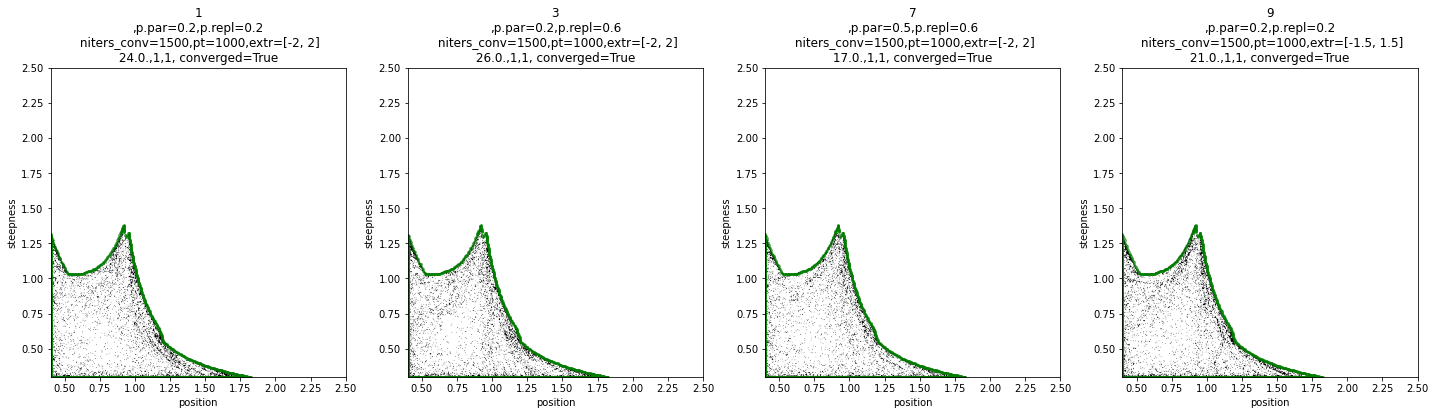

writing file to check in mat_N6univ_11.in
jid is 15
../clustersearch/2022_01_22_N6univ_otherp/final_results/mat_N6univ_15_last.npy
writing file to check in mat_N6univ_15.in
jid is 17
../clustersearch/2022_01_22_N6univ_otherp/final_results/mat_N6univ_17_last.npy
writing file to check in mat_N6univ_17.in
jid is 19
../clustersearch/2022_01_22_N6univ_otherp/final_results/mat_N6univ_19_last.npy
writing file to check in mat_N6univ_19.in
jid is 23
../clustersearch/2022_01_22_N6univ_otherp/final_results/mat_N6univ_23_last.npy


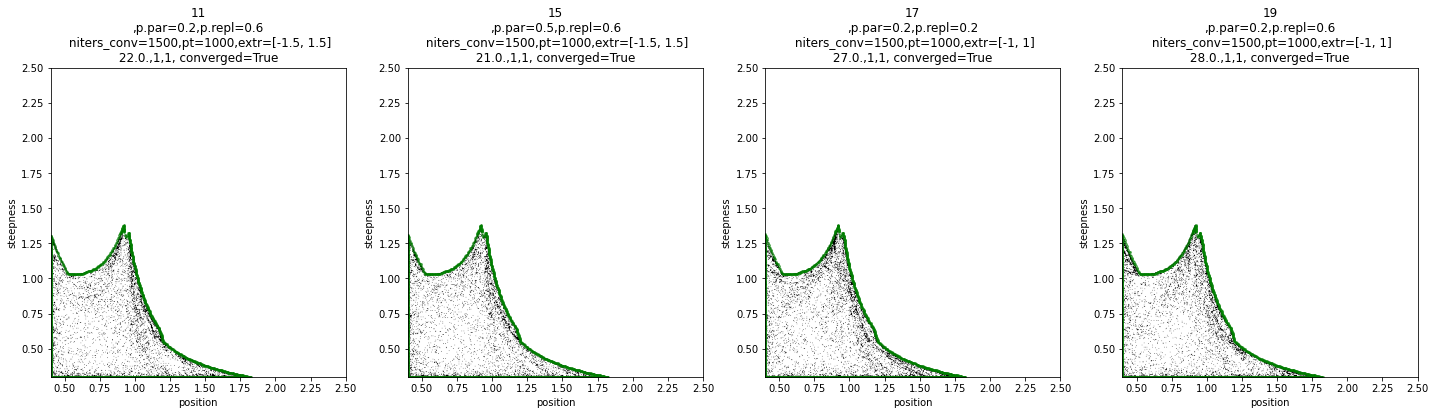

writing file to check in mat_N6univ_23.in
jid is 25
../clustersearch/2022_01_22_N6univ_otherp/final_results/mat_N6univ_25_last.npy
writing file to check in mat_N6univ_25.in
jid is 27
../clustersearch/2022_01_22_N6univ_otherp/final_results/mat_N6univ_27_last.npy
writing file to check in mat_N6univ_27.in
jid is 29
../clustersearch/2022_01_22_N6univ_otherp/final_results/mat_N6univ_29_last.npy
writing file to check in mat_N6univ_29.in


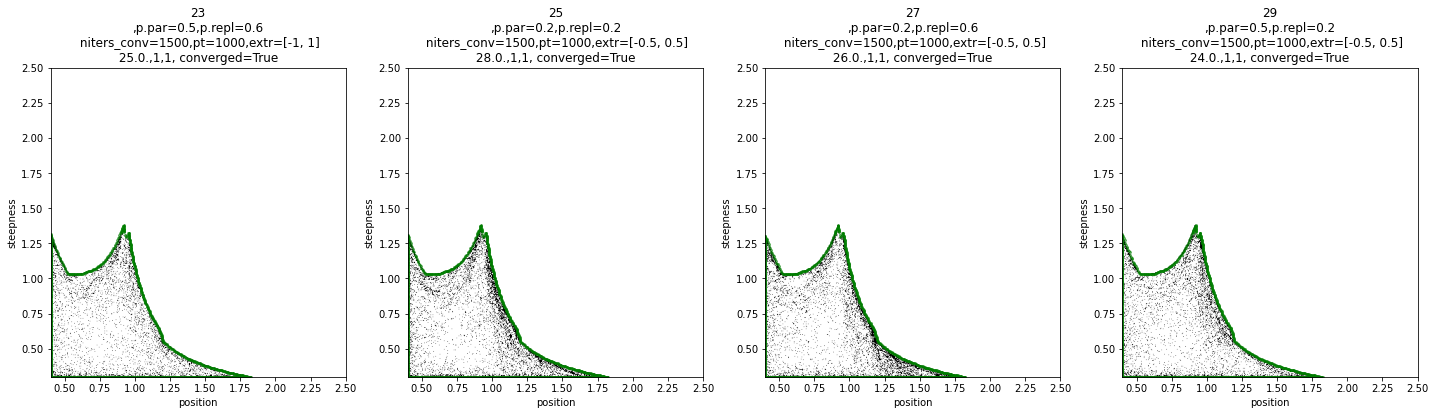

folder to check with mathematica is ../clustersearch/2022_01_22_N6univ_otherp/tocheck_N6univ
(441, 421)


/Users/rosamartinezcorral/Dropbox (HMS)/work2/shared/utilsGRF/AnalyseBoundarysearch.py:410: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  allpdf=pd.DataFrame(np.array(allpointslist),columns=allpointscolnames)


Processing [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
jid is 0
../clustersearch/2022_01_22_N6univ_otherp/final_results/mat_N6univ_0_last.npy
writing file to check in mat_N6univ_0.in
jid is 2
../clustersearch/2022_01_22_N6univ_otherp/final_results/mat_N6univ_2_last.npy
writing file to check in mat_N6univ_2.in
jid is 4
../clustersearch/2022_01_22_N6univ_otherp/final_results/mat_N6univ_4_last.npy
writing file to check in mat_N6univ_4.in
jid is 6
../clustersearch/2022_01_22_N6univ_otherp/final_results/mat_N6univ_6_last.npy
writing file to check in mat_N6univ_6.in
jid is 8
../clustersearch/2022_01_22_N6univ_otherp/final_results/mat_N6univ_8_last.npy


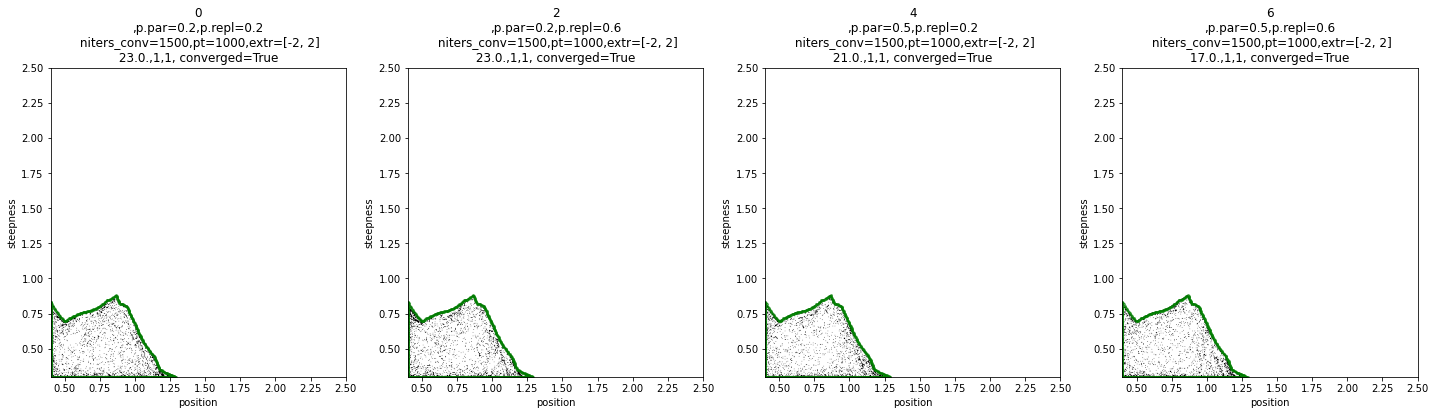

writing file to check in mat_N6univ_8.in
jid is 10
../clustersearch/2022_01_22_N6univ_otherp/final_results/mat_N6univ_10_last.npy
writing file to check in mat_N6univ_10.in
jid is 12
../clustersearch/2022_01_22_N6univ_otherp/final_results/mat_N6univ_12_last.npy
writing file to check in mat_N6univ_12.in
jid is 14
../clustersearch/2022_01_22_N6univ_otherp/final_results/mat_N6univ_14_last.npy
writing file to check in mat_N6univ_14.in
jid is 16
../clustersearch/2022_01_22_N6univ_otherp/final_results/mat_N6univ_16_last.npy


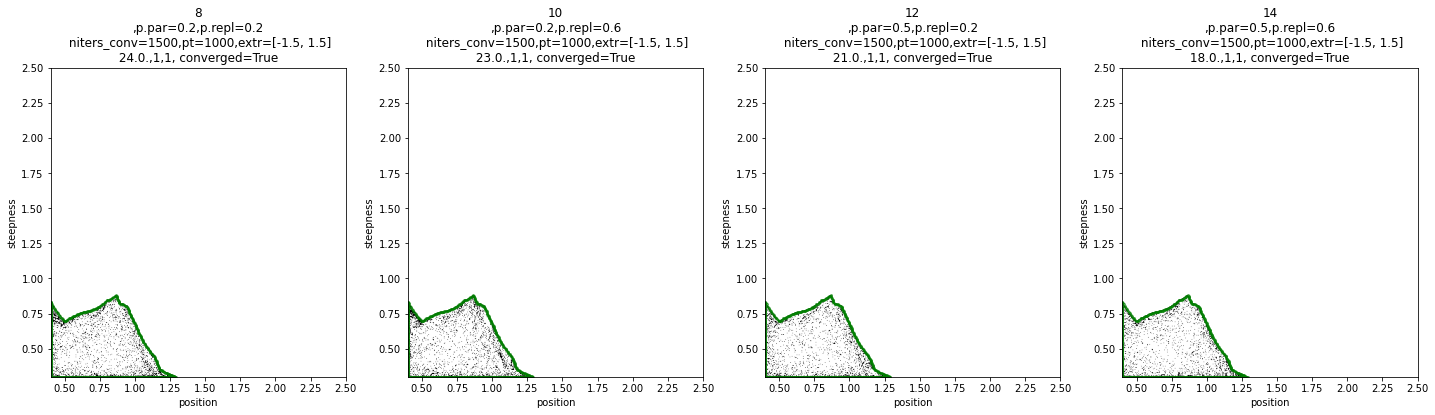

writing file to check in mat_N6univ_16.in
jid is 18
../clustersearch/2022_01_22_N6univ_otherp/final_results/mat_N6univ_18_last.npy
writing file to check in mat_N6univ_18.in
jid is 20
../clustersearch/2022_01_22_N6univ_otherp/final_results/mat_N6univ_20_last.npy
writing file to check in mat_N6univ_20.in
jid is 22
../clustersearch/2022_01_22_N6univ_otherp/final_results/mat_N6univ_22_last.npy
writing file to check in mat_N6univ_22.in
jid is 24
../clustersearch/2022_01_22_N6univ_otherp/final_results/mat_N6univ_24_last.npy


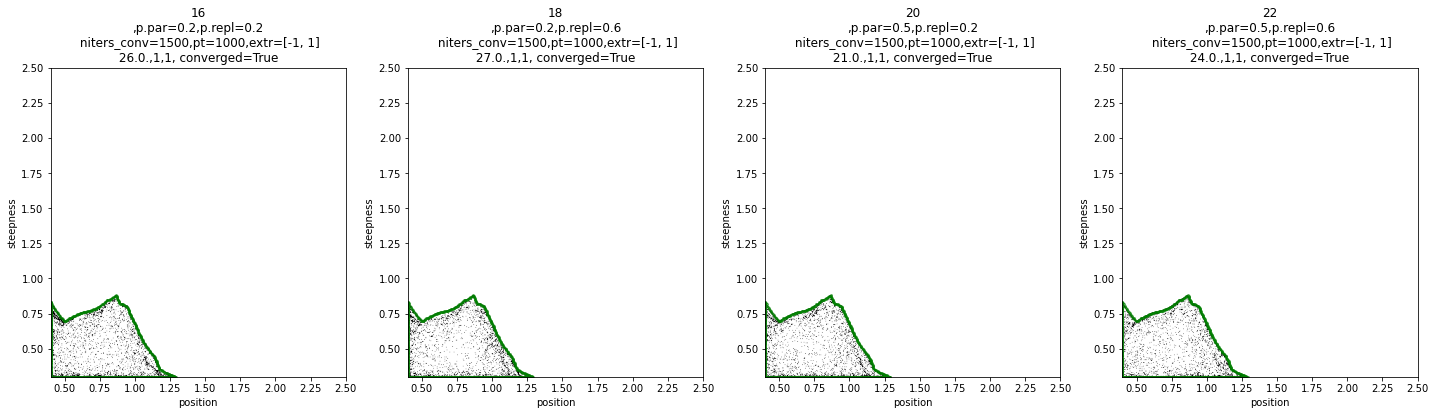

writing file to check in mat_N6univ_24.in
jid is 26
../clustersearch/2022_01_22_N6univ_otherp/final_results/mat_N6univ_26_last.npy
writing file to check in mat_N6univ_26.in
jid is 28
../clustersearch/2022_01_22_N6univ_otherp/final_results/mat_N6univ_28_last.npy
writing file to check in mat_N6univ_28.in
jid is 30
../clustersearch/2022_01_22_N6univ_otherp/final_results/mat_N6univ_30_last.npy
writing file to check in mat_N6univ_30.in


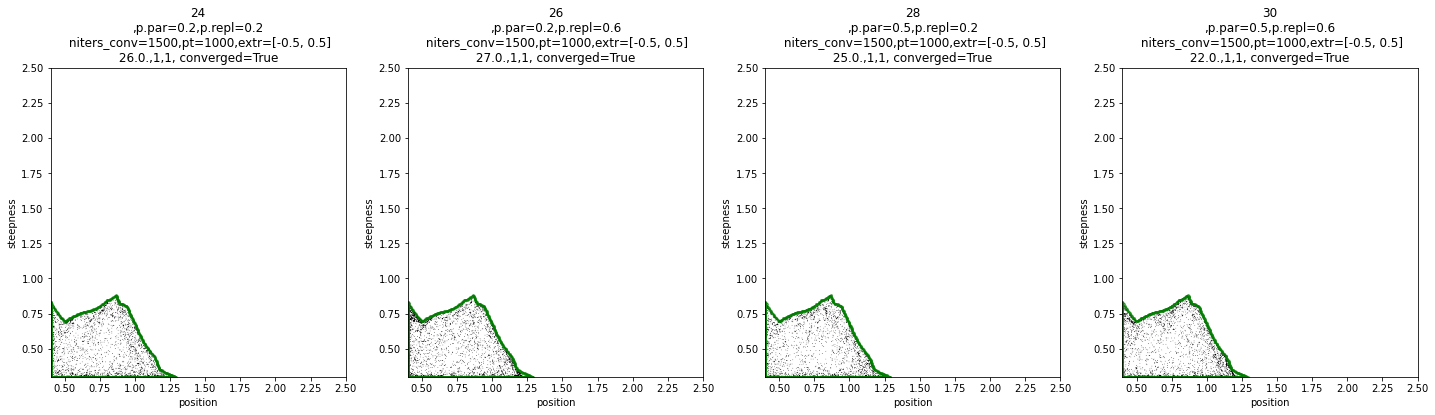

folder to check with mathematica is ../clustersearch/2022_01_22_N6univ_otherp/tocheck_N6univ
(441, 421)


In [5]:
processrawdata=True

#if processrawdata:
allbs=dict()
allchecks=dict()



args={'njobs':None, #in case any of the searches failed, otherwise indicate number of jobs 
      'final':True, #most jobs converged. Those that did not will be looked into the unfinishedfolder
      'printtocheck':True,#print results to check with an alternative method or software e.g. mathematica
      'fldr':folder1,
      'basename':basename,
    'joinmats':True,
      'jid_num':jid, 
      'reference':None, 
      'xlabel':'position', 'ylabel':'steepness',
      'getallpoints':True,
     'septime':" ",
     'difparslimit':True,#True if the search was launched for different parameter ranges
     'unfinishedfolder':unfinishedfolder} #plot also the unfinished to make sure no point is outside the boundary in the ones that did not finish
results=AnalyseBoundarysearch.plot_boundaries_search(**args)
   
    

In [6]:
checkf=results[0][1] 
#tolerance manually modified to 0.0075
print(checkf)
command="wolframscript -file ../bin/N6univ_manualfix.wl '%s' '%s'"%(checkf,absder)  
! $command

../clustersearch/2022_01_22_N6univ_otherp/tocheck_N6univ
First line
absder True
mat_N6univ_0.in
mat_N6univ_0_checked.out
starting at
../clustersearch/2022_01_22_N6univ_otherp/tocheck_N6univ
Defined GRF

                                   -308
General::munfl: 0.501187 2.81023 10     is too small to represent as a normalized machine number; precision may be lost.

                                   -308
General::munfl: 0.501187 3.70477 10     is too small to represent as a normalized machine number; precision may be lost.

                                   -308
General::munfl: 0.731444 2.81023 10     is too small to represent as a normalized machine number; precision may be lost.

General::stop: Further output of General::munfl will be suppressed during this calculation.

Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.
1,
Solve::ratnz: Solve was unable to solve the 

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,

limits of parameters:,0.501187 1.99526;0.501187 1.99526;0.501187 1.99526;0.501187 1.99526;0.501187 1.99526;0.501187 1.99526;0.501187 1.99526;0.501187 1.99526;0.501187 1.99526;0.501187 1.99526;0.501187 1.99526;0.501187 1.99526;0.501187 1.99526;0.501187 1.99526;0.501187 1.99526;0.501187 1.99526;

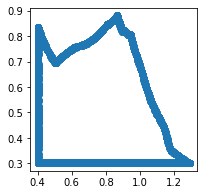

limits of parameters:,0.199526 5.01187;0.199526 5.01187;0.199526 5.01187;0.199526 5.01187;0.199526 5.01187;0.199526 5.01187;0.199526 5.01187;0.199526 5.01187;0.199526 5.01187;0.199526 5.01187;0.199526 5.01187;0.199526 5.01187;

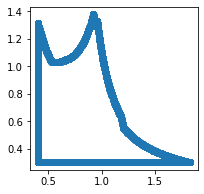

In [7]:
checkedfiles1=[x for x in os.listdir(checkf) if ".out" in x and "checked" in x]#all parameter sets tested with max derivative not at 0 and coincident result with mathematica

parlims_nums=[[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30],
              [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 23, 25, 27, 29]] #copy-paste from what is printed above
             
              
              
checked_pos_stp=[[] for x in range(len(parlims_nums))]
for plim in range(2):
    allpos=[]
    allrhos=[]
    print("limits of parameters:", end=",")
    for f in checkedfiles1:
        #print(f)
        num=int(f.split("_")[2])
        #print(f,num)
        if num in parlims_nums[plim]:
            data=pd.read_csv(os.path.join(checkf,f),sep=",|;",engine="python") #sep and engine are used to indicate that there are 2 separators
            pos=data["pos"].values
            stp=data["rho"].values
            print(data.values[:,2:].min(),data.values[:,2:].max(),end=";")
            allpos.extend(pos)
            allrhos.extend(stp)
    fig,ax=plt.subplots(1,1,figsize=(3,3))
    ax.scatter(allpos,allrhos)
    plt.show()
    checked_pos_stp[plim]=[allpos,allrhos]
    
    

In [8]:
folder1

'../clustersearch/2022_01_22_N6univ_otherp'

In [9]:
step=0.005
stp_ar=np.arange(0.3,2.5+step,step)
pos_ar=np.arange(0.4,2.5+step,step)

# it is hard to get the alphashape right just with the boundary, so using extra points
mat=np.load(os.path.join(folder1 ,"final_results","mat_N6univ_0_last.npy"))
mat_pars=np.load(os.path.join(folder1 ,"final_results","mat_pars_N6univ_0_last.npy"))
#plt.imshow(mat)[::-1]

extrapoints=[]
indices=[]
for r in range(len(stp_ar)):
    for c in range(len(pos_ar)):
        cell=mat[r,c]
        if cell>0:
            extrapoints.append((pos_ar[c],stp_ar[r]))
            indices.append([r,c])
            
mat=np.load(os.path.join(folder1 ,"final_results","mat_N6univ_1_last.npy"))
mat_pars=np.load(os.path.join(folder1 ,"final_results","mat_pars_N6univ_1_last.npy"))
#plt.imshow(mat)[::-1]

extrapoints2=[]
indices2=[]
for r in range(len(stp_ar)):
    for c in range(len(pos_ar)):
        cell=mat[r,c]
        if cell>0:
            extrapoints2.append((pos_ar[c],stp_ar[r]))
            indices2.append([r,c])
            

            

2022_8_23
[0.3, 0.7]


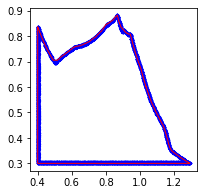

./ashapes/ashape_N6univ_0.3_2022_8_23.npy


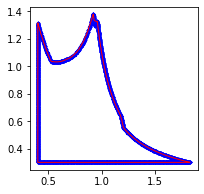

./ashapes/ashape_N6univ_0.7_2022_8_23.npy


In [10]:

localt=time.localtime()
string="%d_%d_%d"%(localt[0],localt[1],localt[2])
print(string)


plims=[np.log10(x[1]) for x in extremespars]
print(plims)
for i in range(len(plims)):
    data=checked_pos_stp[i]
    allpoints=results[i][2]
    
    

    l_p=[(data[0][j],data[1][j]) for j in range(len(data[0]))] 
    if i==0:
        l_p.extend(extrapoints)
        alpha=60
    else:
        l_p.extend(extrapoints2)
        alpha=60
   
    plt.figure(figsize=(3,3))
    plt.scatter(data[0],data[1],color="b",s=5)

    a=alphashape.alphashape(l_p,alpha=alpha)   #tweak alpha until it adapts well to the points
    plt.plot(a.exterior.xy[0],a.exterior.xy[1],color="r",linewidth=1)
    plt.show()
    ashapename=os.path.join(ashapesfolder,"%s_%g_%s.npy"%(name_ashape,plims[i],string)) #previous date was 2022_2_25
    print(ashapename)
    np.save(ashapename,(a.exterior.xy))


In [11]:
def plot_hillline(ax,nmax=1):
    nrange=np.arange(1.8,nmax+0.2,0.1)
    hillline=np.vstack([BF.position_steepness_hill(n) for n in nrange])
    #fig,ax=plt.subplots(1,1,figsize=(5,5))
    ax.plot(hillline[:,0],hillline[:,1],color='gray',linestyle='--',label='Hill line')
    for n in range(2,nmax):
        ph,sh=BF.position_steepness_hill(n)
        ax.scatter(ph,sh,color='gray')
        ax.text(ph*1.01,sh*0.98,'n=%d'%n,color='gray')
    ax.legend()
    #ax.set_xlim(0.499,1.2)
    ax.set_xlabel('position')
    ax.set_ylabel('steepness')
    return ax

0.3
0.7


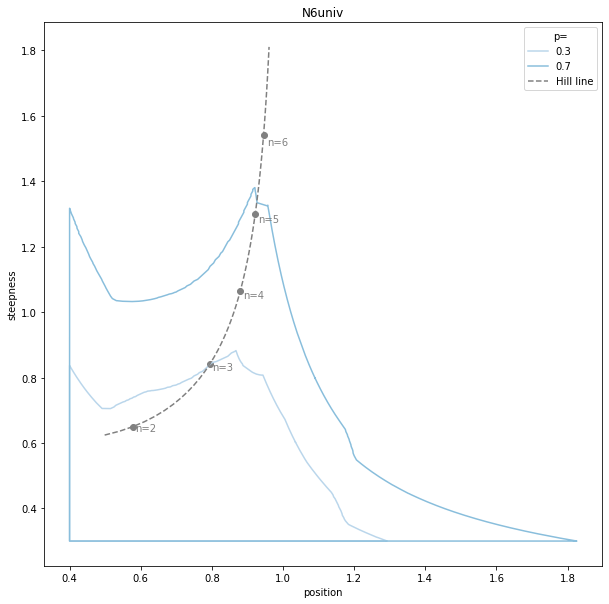

In [12]:
colors=plt.cm.Blues(np.linspace(0,1,8)[2:])
fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.set_title("%s"%basename)
linestyles=["-","-","-","--",":"]
for i in range(len(plims)):
    print(plims[i])
    date=string
    ashape=np.load(os.path.join(ashapesfolder,"%s_%g_%s.npy"%(name_ashape,plims[i],date)))
    ax.plot(ashape[0],ashape[1],color=colors[i],label="%g"%plims[i],linestyle=linestyles[i])
    ax.set_xlabel("position")
    ax.set_ylabel("steepness")
ax=plot_hillline(ax,nmax=7)
ax.legend(title="p=")
plt.show()
